## Table of Contents

1. Introduction
2. Data Loading & Initial Exploration
3. Data Cleaning
4. Exploratory Data Analysis (EDA)
   4.1 Distribution of Diamond Prices
   4.2 Carat vs. Price
   4.3 Cut, Color, and Clarity
   4.4 Correlation Analysis
   4.5 Feature Engineering: Volume
5. Conclusion


<a id ="intro"></a> <br>
### What Drives Diamond Prices ? An Exploratory Data Analysis Using the Diamonds Dataset.

Diamonds are one of the most valuable natural resources in the world but what makes one diamond more expensive
than another?

In this project, I explore Diamonds dataset from ggplot2 package, which contains prices and physical characteristics of over 50,000 diamonds.

Through a series of data cleaning, visualization, and correlation analysis steps, I aim to answer one central question:

What are key features that influence the price of a diamond?

This analysis can help data scientists, jewelers, and curious buyers better understand how attributes like
carat, cut, clarity, color, and dimensions affect diamond valuation.


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## 2. Data Loading & Initial Exploration

#### 2.1 Loading the dataset
I began by loading the dataset using pandas. The Diamonds dataset contains information on over 50,000 diamonds, including pricing, quality grades (cut, color, clarity), and physical measurements.

In [12]:
diamonds = pd.read_csv("data/diamonds.csv")

#### 2.2 Previewing Data
Below is a preview of the first few rows of the dataset to understand structure and features.

In [14]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### 2.3 Dataset Shape & Basic Info

The dataset contains 53,940 rows and 10 columns. Below is a summary of the column data types and non-null value counts.

In [16]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


##### Let's explore our data properties which columns are categorical while which are continuous.


In [18]:
diamonds.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

As seen above, the 'cut', 'color', and 'clarity' columns have fewer unique values, indicating that they are categorical features. The remaining columns have high cardinality, suggesting they are continuous variables.

Let's check if there is any missing data in our dataset.

In [20]:
diamonds.isnull().any()


carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

None of the columns contain null values. Therefore, there is no need to handle missing data in this dataset.

#### Descriptive Statistics

The table below shows basic statistics for the numerical columns. This helps us understand the scale, spread, and potential outliers in the dataset.

In [23]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


While the dataset does not contain missing values, I observed that some physical dimension columns (`x`, `y`, `z`) contain zero values. These will be treated as invalid and addressed during the data cleaning phase.

## 3. DATA CLEANING.


Although the dataset contains no missing values, a closer inspection reveals that some physical dimension
columns (x, y, z) contain zero values. Since they represent length, width and depth of a diamond, a value of zero is not physically valid.
These rows will be considered corrupted and removed from the dataset.

In [27]:
len(diamonds[(diamonds["x"] == 0) | (diamonds["y"] == 0) | (diamonds["z"] == 0)])
# Using | (or) operator to find rows where any physical dimension is zero


20

As seen above, dataset has 20 rows where either x, y or z is equal to 0.

The dataset contains total 53,940 rows, so dropping 20 will not have a significant impact.

### 3.2 Removing Invalid Rows
I removed rows where any of the physical dimensions (x, y or z) were zero.
These rows likely represent data entry errors or missing measurements.

In [30]:
len(diamonds) # Length of dataset before the dropping.

53940

In [31]:

diamonds.drop(diamonds[(diamonds["x"] == 0) | (diamonds["y"] ==  0) | (diamonds["z"] == 0)].index , inplace = True)

Confirming Cleaned Dataset.

After removing invalid rows, I confirmed that no diamonds remain with zero values in their physical dimensions.

In [33]:
len(diamonds) # Length of dataset after the dropping.

53920

In [34]:
len(diamonds[(diamonds["x"] == 0) | (diamonds["y"] == 0) | (diamonds["z"] == 0)])

0

To visually confirm that no diamonds remain with zero values in their physical dimensions, I plotted the distributions of the x, y, and z features. All values appear to be strictly greater than zero, supporting the data cleaning step.


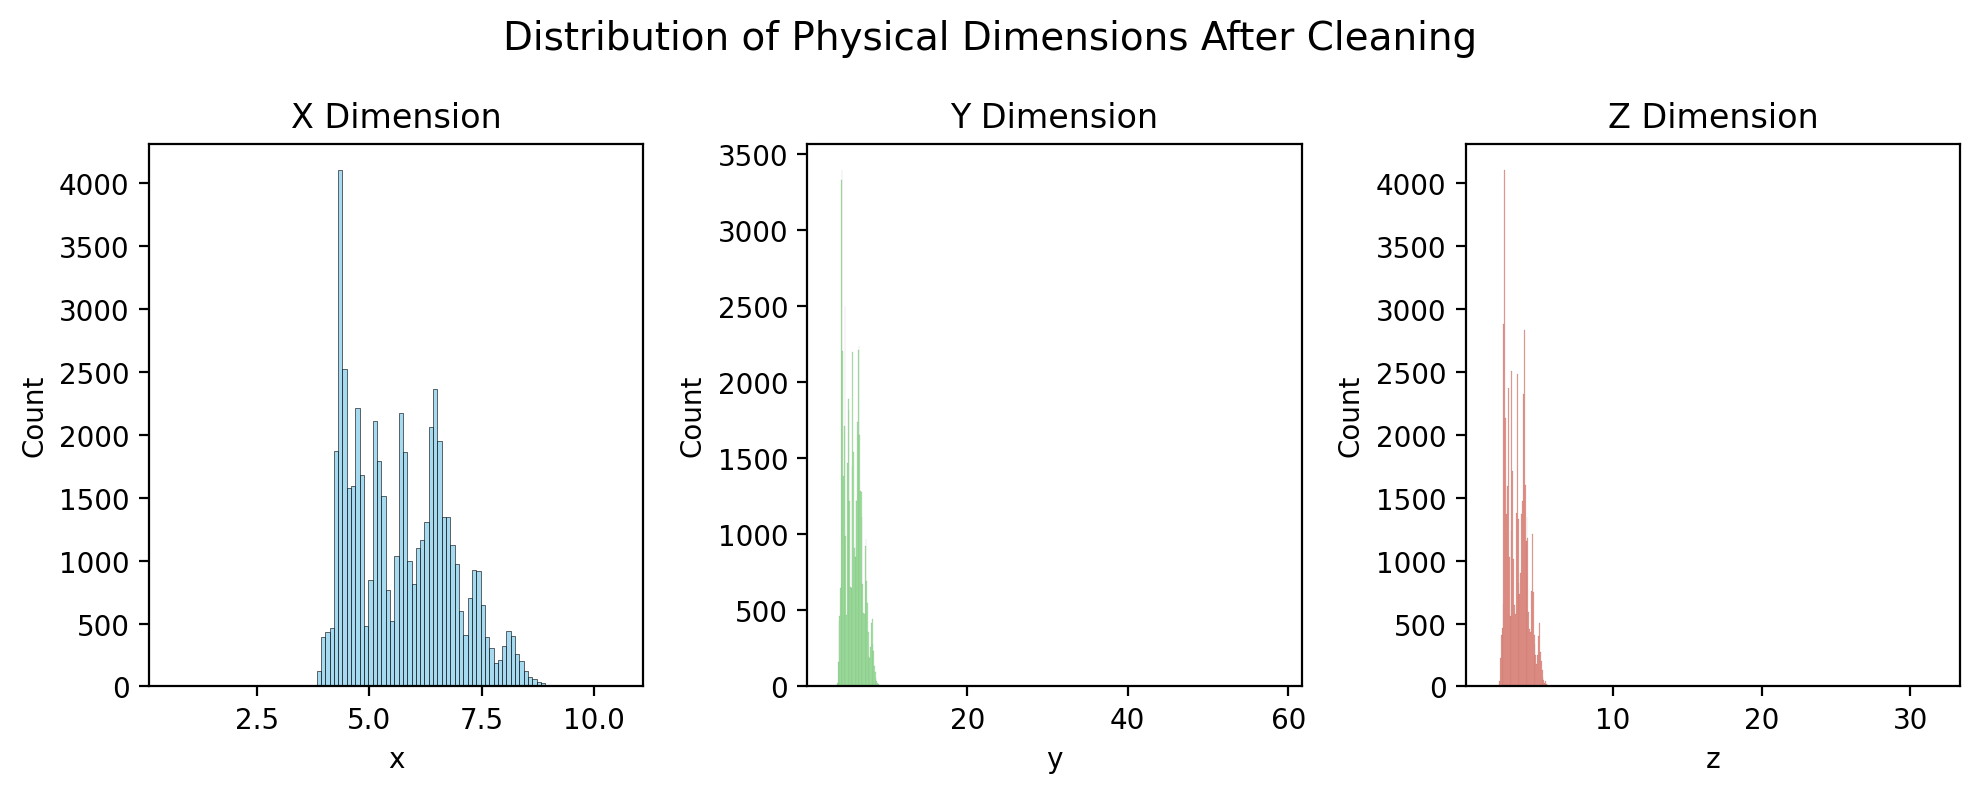

In [36]:
fig, axes = plt.subplots(nrows = 1, ncols = 3 , figsize =(10,4) , dpi = 200)
sns.histplot(data = diamonds["x"] , ax = axes[0] , color ="skyblue")
axes[0].set_title("X Dimension")
sns.histplot(data = diamonds["y"] , ax = axes[1] , color = "lightgreen")
axes[1].set_title("Y Dimension")
sns.histplot(data = diamonds["z"] , ax = axes[2] , color = "salmon")
axes[2].set_title("Z Dimension")
axes[0].set_xlim(left=0.1)
axes[1].set_xlim(left=0.1)
axes[2].set_xlim(left=0.1)
fig.suptitle("Distribution of Physical Dimensions After Cleaning" , fontsize = 14)
plt.tight_layout()
plt.show()


## 4. Exploratory Data Analysis (EDA)

In this section, I explore the Diamonds dataset to uncover key patterns and relationships between various features and diamond prices.
The goal is gain insights into how different physical and categorical attributes influence the overall valuation.

I will investigate the following questions:

- What is the distribution of diamond prices?
- How does carat weight relate to price?
- How do categorical features such as cut, color and clarity affect pricing?
- Which features are most strongly correlated with diamond price?
- Do combinations of features (e.g.,  cut and carat) explain price variation better?

Through visualizations and statistical summaries, this EDA will guide us toward building a deeper understanding of the key drivers of diamond value.


### 4.1 What is the distribution of diamond prices ?

Understanding the price distribution helps identify skewness, pricing outliers, and overall range.
This gives us a baseline understanding of how diamond prices vary in the dataset.


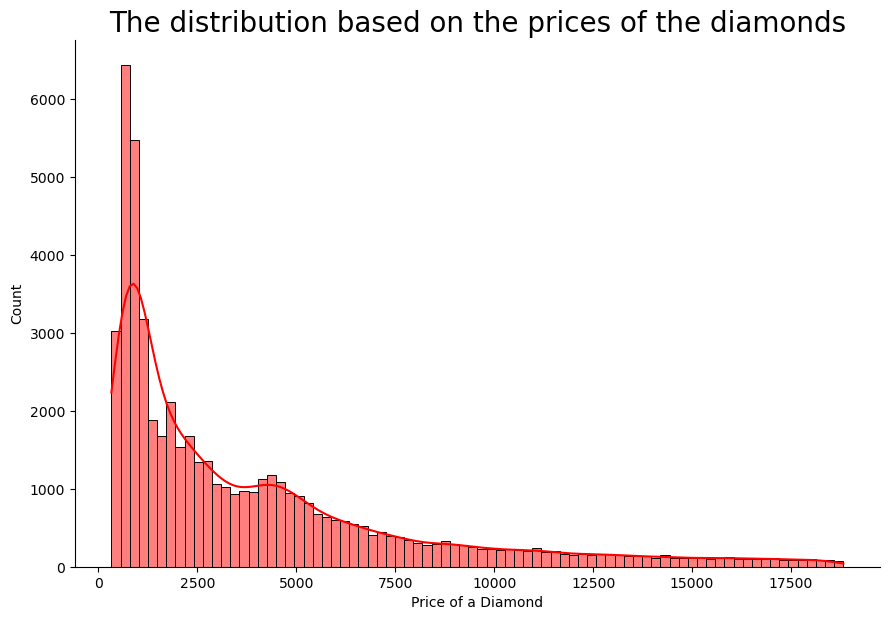

In [39]:
sns.displot(diamonds["price"] , fill = True , color = "red" , kde = True , height = 6 , aspect = 1.5)
plt.xlabel("Price of a Diamond")
plt.title("The distribution based on the prices of the diamonds" , fontsize =20)
plt.show()

The histogram shows a right-skewed distribution, where most diamonds are priced below \5000$
There are small number of high-priced outliers, suggesting luxury or high-carat stones are rare.
This confirm that diamond prices are not normally distributed.

### 4.2 How does carat affect price?

Carat is one of the most influential factors in diamond valuation, as it measures the weight of a diamond.
In this section, I examine the relationship between Carat and Price to understand how weight impacts cost.
By visualizing this relationship, we can determine if heavier diamonds consistently command higher prices, and whether that relationship appears linear, exponential or otherwise.

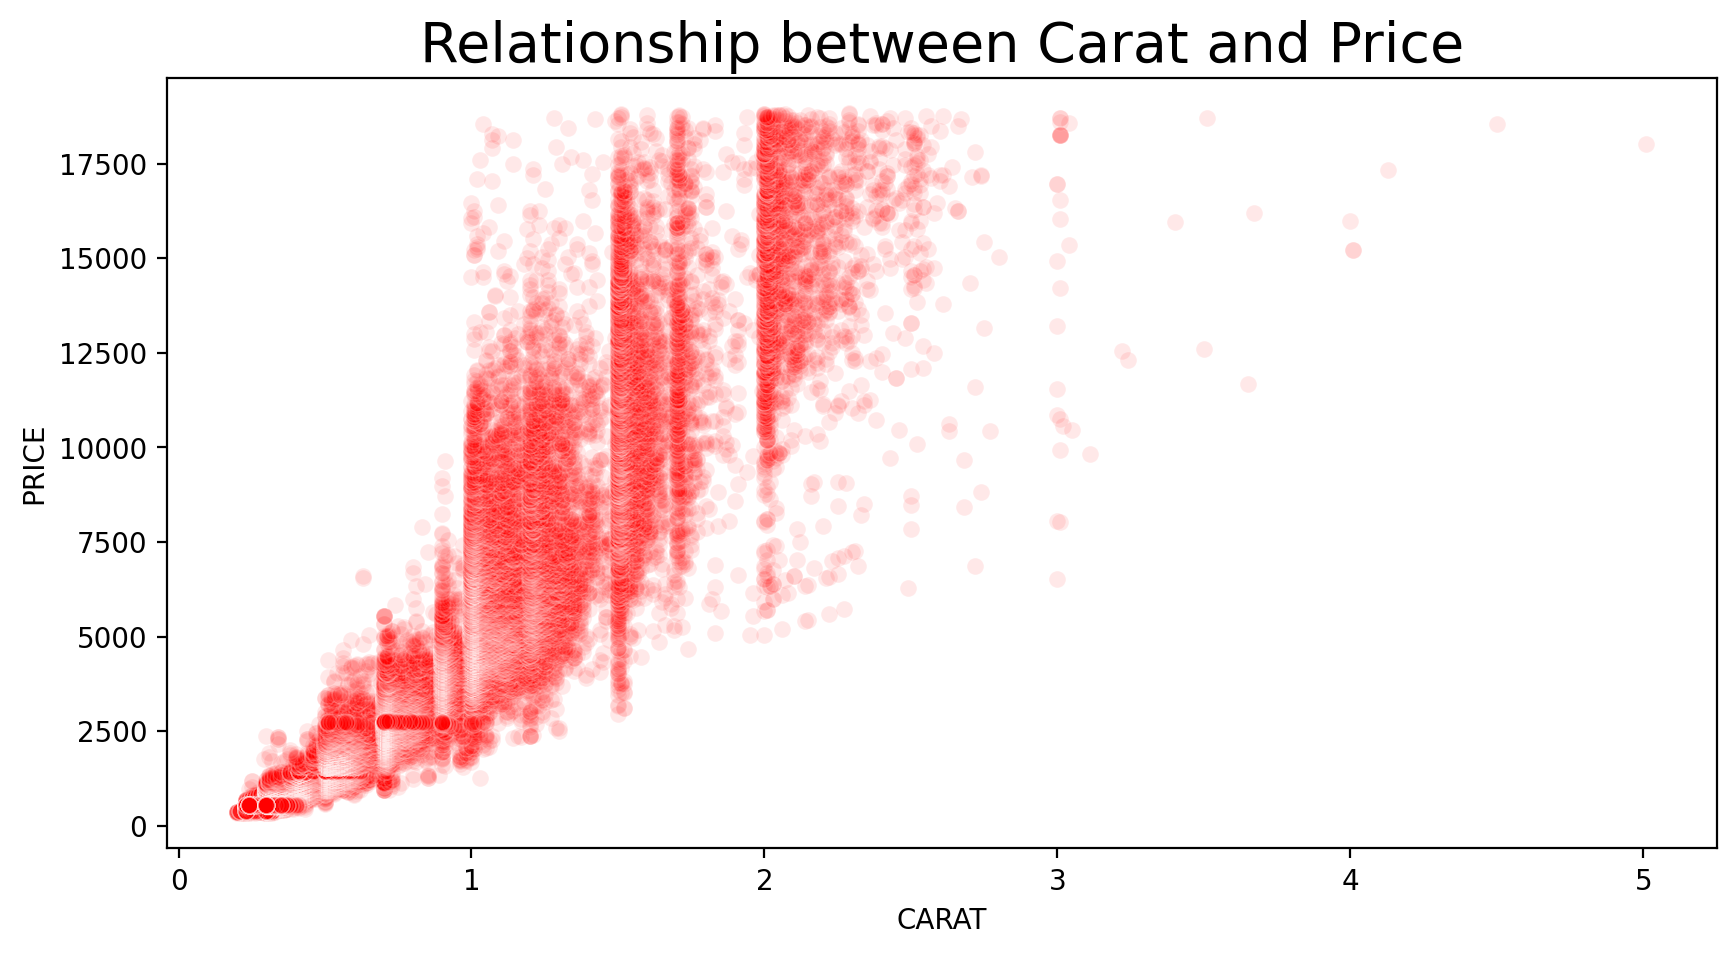

In [42]:
plt.figure(figsize = (10,5) , dpi = 200)
sns.scatterplot(data = diamonds , x = "carat" , y = "price", alpha = 0.09, color = "red")
plt.title("Relationship between Carat and Price" , fontsize = 20)
plt.xlabel("CARAT")
plt.ylabel("PRICE")
plt.show()

The scatterplot shows a clear **positive, nonlinear** relationship between carat and price.
As carat increases, the price tends to rise rapidly, suggesting that larger diamonds command disproportionately higher prices.
There are some visible clusters around specific carat weights (e.g., 0.5, 1.0, 1.5), possibly reflecting popular market thresholds or standardized sizes.
This confirms that carat is a strong and continuous predictor of price, but the relationship appears to be exponential rather than linear.

### 4.3 How do cut, color and clarity affect diamond prices?

Diamond quality is often assessed using categorical features like cut, color and clarity.
In this section, I analyze how much each of these features relates to price by comparing their average or median values.
This helps reveal which grades tend to be more expensive and whether certain grades offer better values.


#### 4.3.1 How do cut affect diamond prices?

The **cut** of a diamond refers to how well it has been shaped and polished, which affects its brilliance and visual In this part, I explore whether diamonds with better cut grades tend to have higher prices.
I used a barplot to visualize the **median** price for each cut category to avoid influence of extreme outliers.

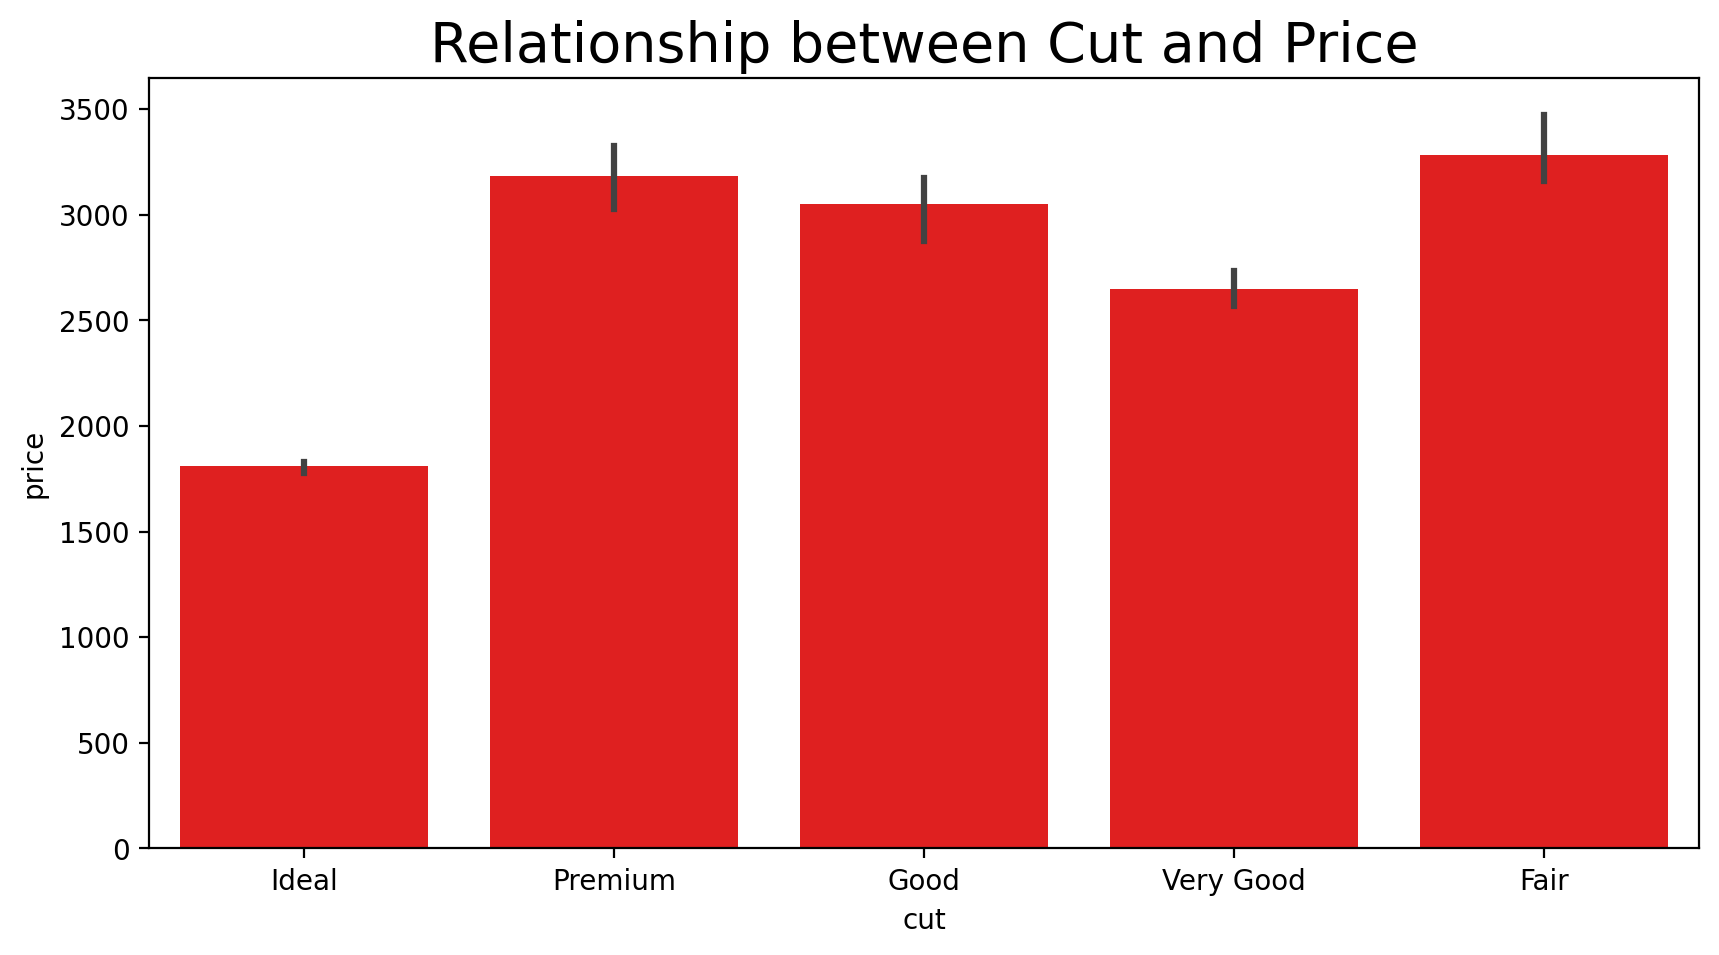

In [46]:
plt.figure(figsize = (10,5) , dpi = 200)
sns.barplot(diamonds , x = "cut" , y = "price" , color = "red", estimator = np.median)
plt.title("Relationship between Cut and Price" , fontsize = 20)
plt.show()

The barplot shows that **Premium** and **Fair** cuts have the highest median prices.
Interestingly, the **Ideal** cut — generally considered top quality — shows the lowest median price, suggesting other features like carat or clarity may be more influential in pricing.
This implies that cut alone doesn't explain the full picture and interactions between features must be explored further.

### 4.3.2 Does color affect price?

Diamond color refers to how colorless a diamond is — less color generally means higher quality and value.
The GIA grading scale categorizes color from **D (best)** to **J (worst)** in the following order:

**D → E → F → G → H → I → J**

In this section, I explore how the median price of diamonds varies across different color grades.

To ensure interpretability, I sort the color grades from D to J according to their quality scale, not alphabetically.

This visualization will help identify whether better color grades (closer to D) actually lead to higher median prices — or whether other factors such as carat weight may play a stronger role in price determination.


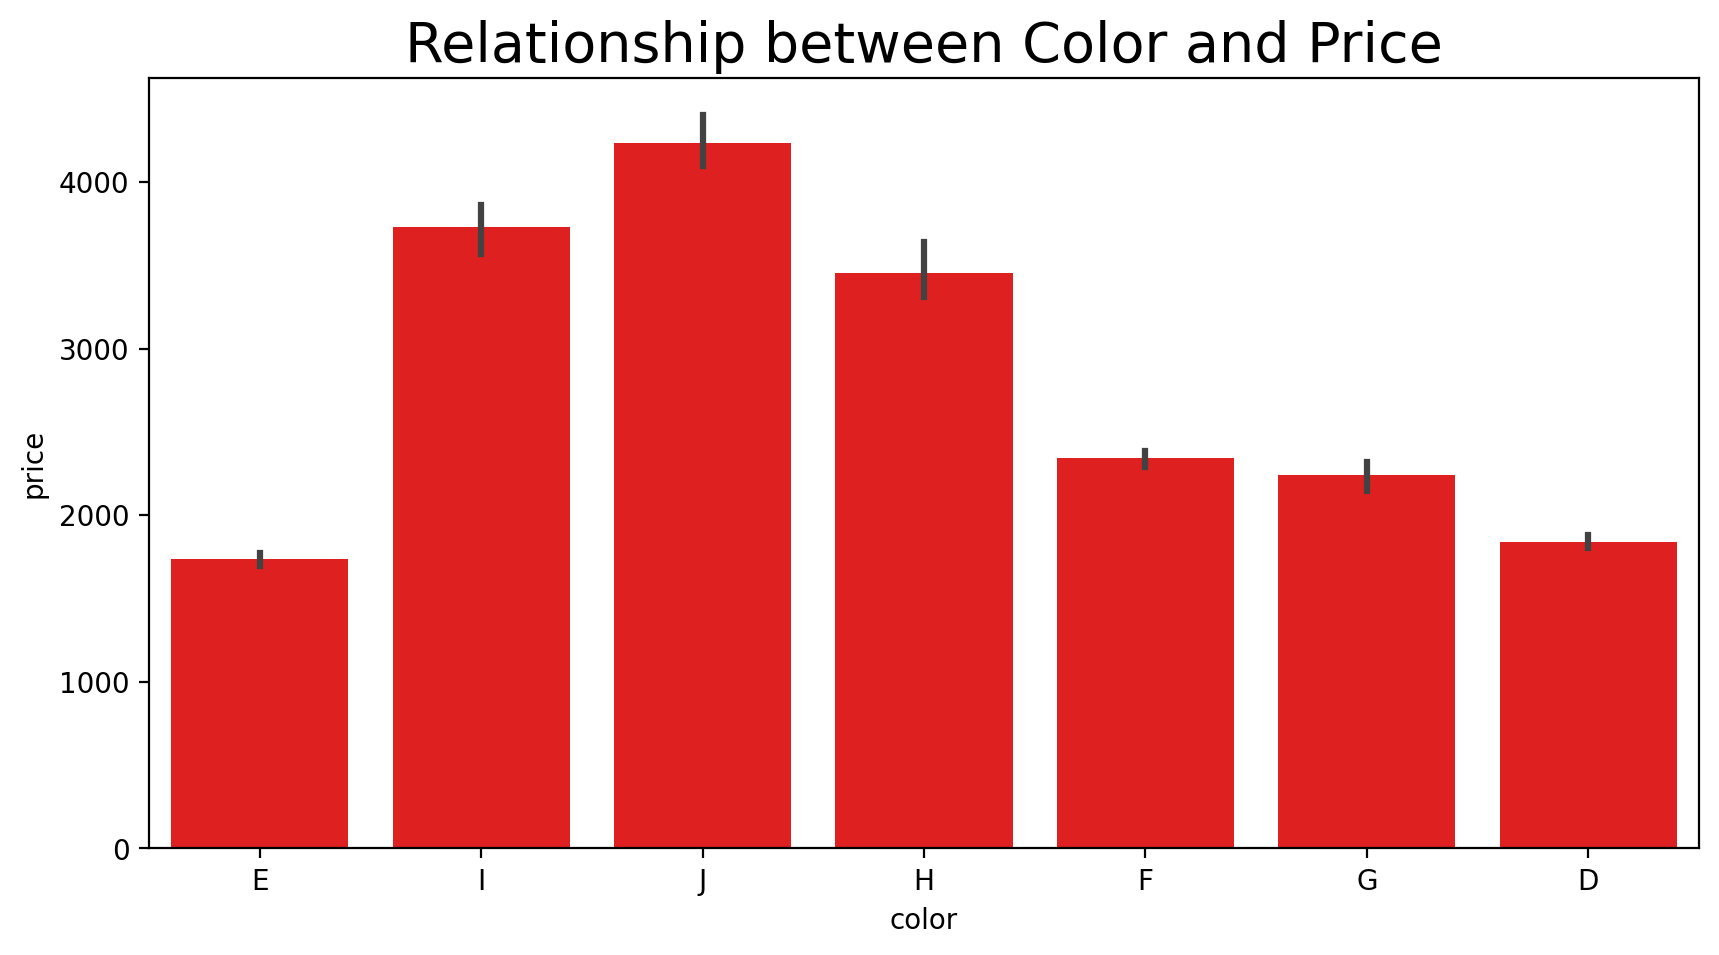

In [49]:
plt.figure(figsize = (10,5) , dpi = 200)
sns.barplot(data = diamonds , x = "color" , y = "price" , color = "red" , estimator = np.median)
plt.title("Relationship between Color and Price" , fontsize = 20)
plt.show()

The bar plot shows an interesting trend:
While **D, E, and F** are considered top-quality colors (near-colorless), their **median prices are actually lower** than diamonds with **colors I and J**.

This suggests that **color alone does not determine the price** of a diamond.
It's likely that **I and J color diamonds have larger carat weights**, which drives their median price up, even though they are lower in color quality.

This highlights the importance of considering multiple features (like carat, clarity, and cut) when analyzing diamond prices — rather than assuming that higher color quality always means a higher price.


#### Deeper Investigation: Why Do Lower-Quality Color Grades Have Higher Prices?

The previous plot showed that diamonds with lower color grades (like **I** and **J**) had surprisingly higher median prices than those with better grades (like **D** and **E**).
This is counterintuitive, as better color typically implies higher value.

To understand this pattern, I perform a deeper investigation:

- **Step 1:** Explore how diamond weight (**carat**) varies across different color grades.
- **Step 2:** Calculate the average **carat** and **price** for each color category.
- **Goal:** Determine if diamonds with worse color are, on average, larger — which would explain their higher prices despite lower color quality.

This analysis helps reveal whether **carat is a confounding factor** that explains the unexpected price pattern observed earlier.

In [52]:
diamonds.groupby("color")[["carat","price"]].mean()


,carat,price
color,,
D,0.657715,3168.106436
E,0.657867,3076.752475
F,0.736480,3725.080205
G,0.770729,3996.876551
H,0.911174,4480.942155
I,1.026702,5089.973990
J,1.162137,5323.818020


As seen in the table above, diamonds with **lower color grades** (like I and J) tend to have a **higher average carat weight** compared to diamonds with better color grades (like D and E).
This helps explain why diamonds with worse color grades can still have **higher average prices** — the increased weight drives up the price despite lower visual quality.

This confirms that **carat plays a dominant role** in determining price, and it can outweigh the impact of color or cut in some cases.

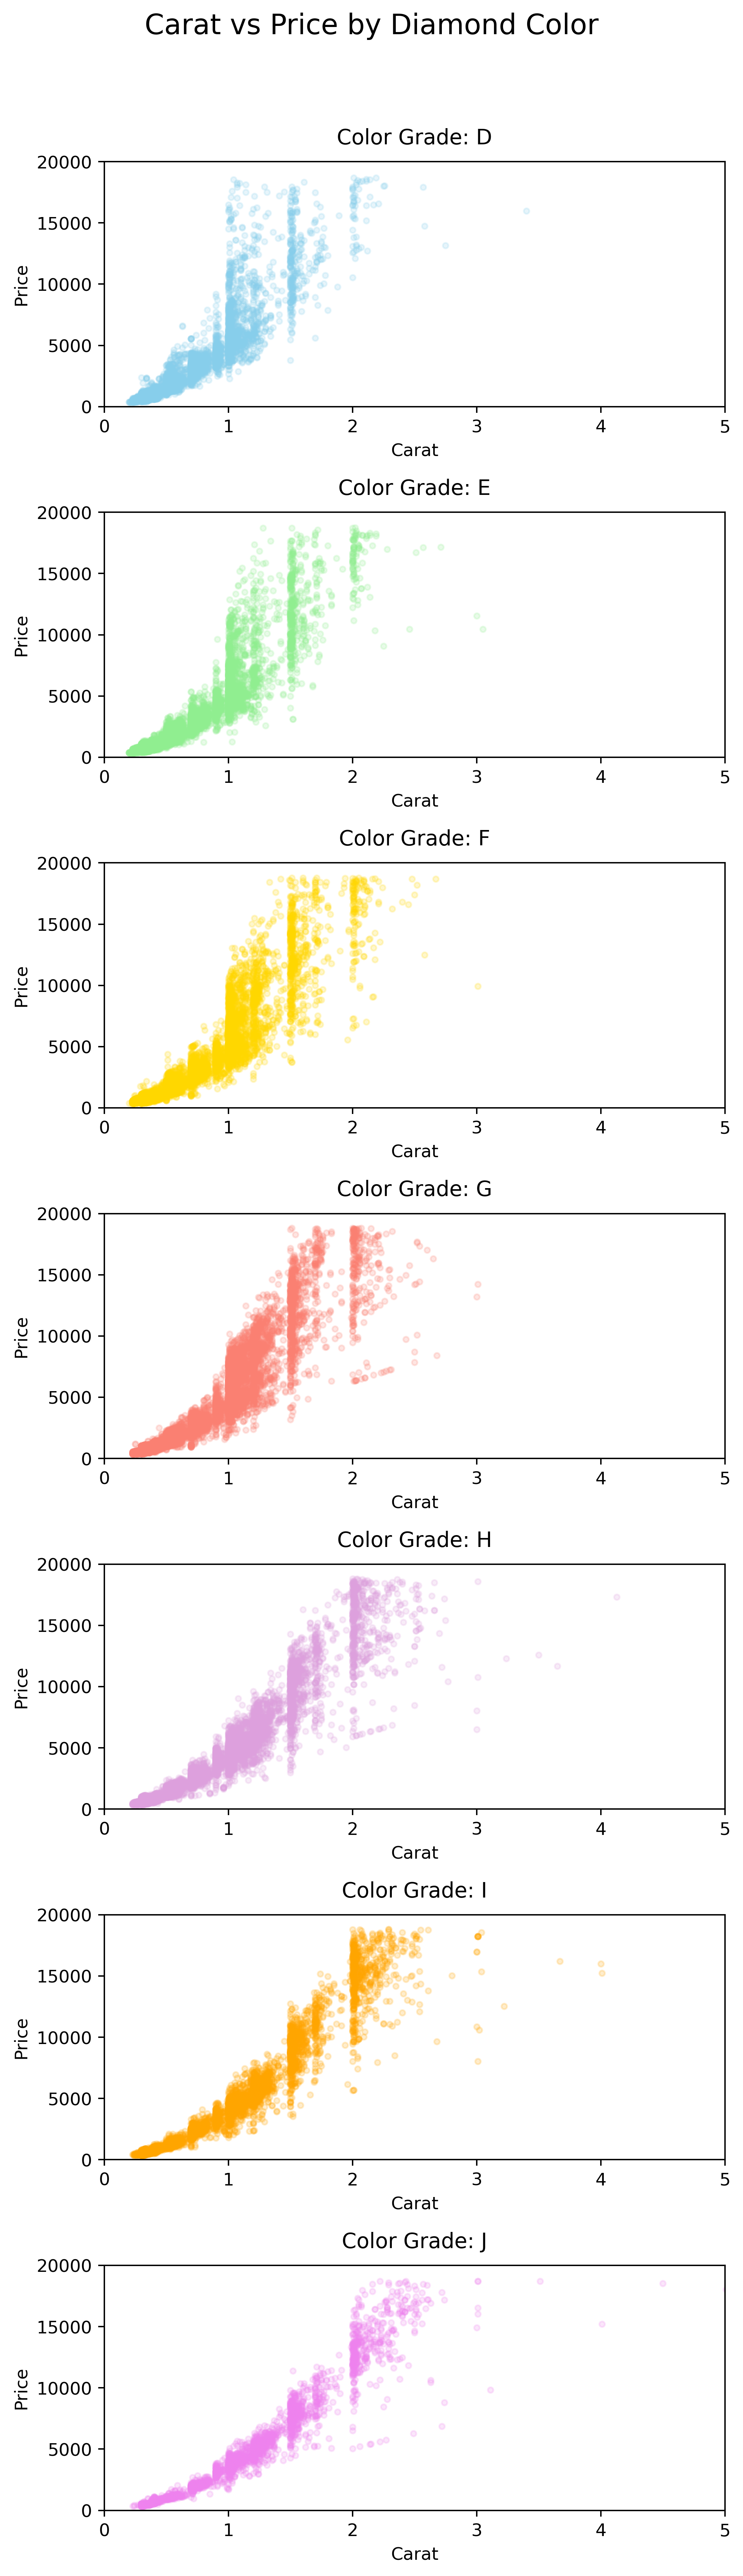

In [54]:
color_grades = ["D", "E", "F", "G", "H", "I", "J"]
colors_list = ["skyblue", "lightgreen", "gold", "salmon", "plum", "orange", "violet"]

fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(6, 20), dpi=350)

for i, grade in enumerate(color_grades):
    subset = diamonds[diamonds["color"] == grade]
    axes[i].scatter(subset["carat"], subset["price"], alpha=0.2, s=10, color=colors_list[i])
    axes[i].set_title(f"Color Grade: {grade}", fontsize=12, pad=10)
    axes[i].set_xlim(0, 5)
    axes[i].set_ylim(0, 20000)
    axes[i].set_xlabel("Carat")
    axes[i].set_ylabel("Price")

plt.subplots_adjust(hspace=0.6)
fig.suptitle("Carat vs Price by Diamond Color", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


#### Deeper Investigation: Carat vs Price by Diamond Color

To better understand why diamonds with lower color grades (such as I and J) tend to have higher prices,
I created individual scatterplots for each color grade, comparing **carat** and **price**.

This visualization allows us to:
- Examine the **distribution of carat sizes** within each color category.
- Identify whether lower-quality color diamonds (e.g., J) tend to have **larger carats**, which could explain their higher price despite lower color quality.

Each subplot uses a different color to improve readability.
From these scatterplots, we can clearly observe that some lower color grades, particularly **J and I**, contain many larger diamonds — reinforcing the idea that **carat weight is a dominant price driver**, often outweighing color quality.

### 4.3.3 How Does Clarity Affect Price?

Clarity measures the presence of internal inclusions or external blemishes in a diamond.
The fewer the flaws, the higher the clarity grade — and potentially the higher the price.

Here is the standard clarity grading scale from **best to worst**:

- **IF**: Internally Flawless (Best)
- **VVS1**: Very, Very Slight Inclusions (1st level)
- **VVS2**: Very, Very Slight Inclusions (2nd level)
- **VS1**: Very Slight Inclusions (1st level)
- **VS2**: Very Slight Inclusions (2nd level)
- **SI1**: Slight Inclusions (1st level)
- **SI2**: Slight Inclusions (2nd level)
- **I1**: Included (visible flaws, Worst)

In this section, I will investigate whether higher clarity grades consistently lead to higher prices,
and explore how strongly clarity impacts diamond valuation compared to features like carat or cut.

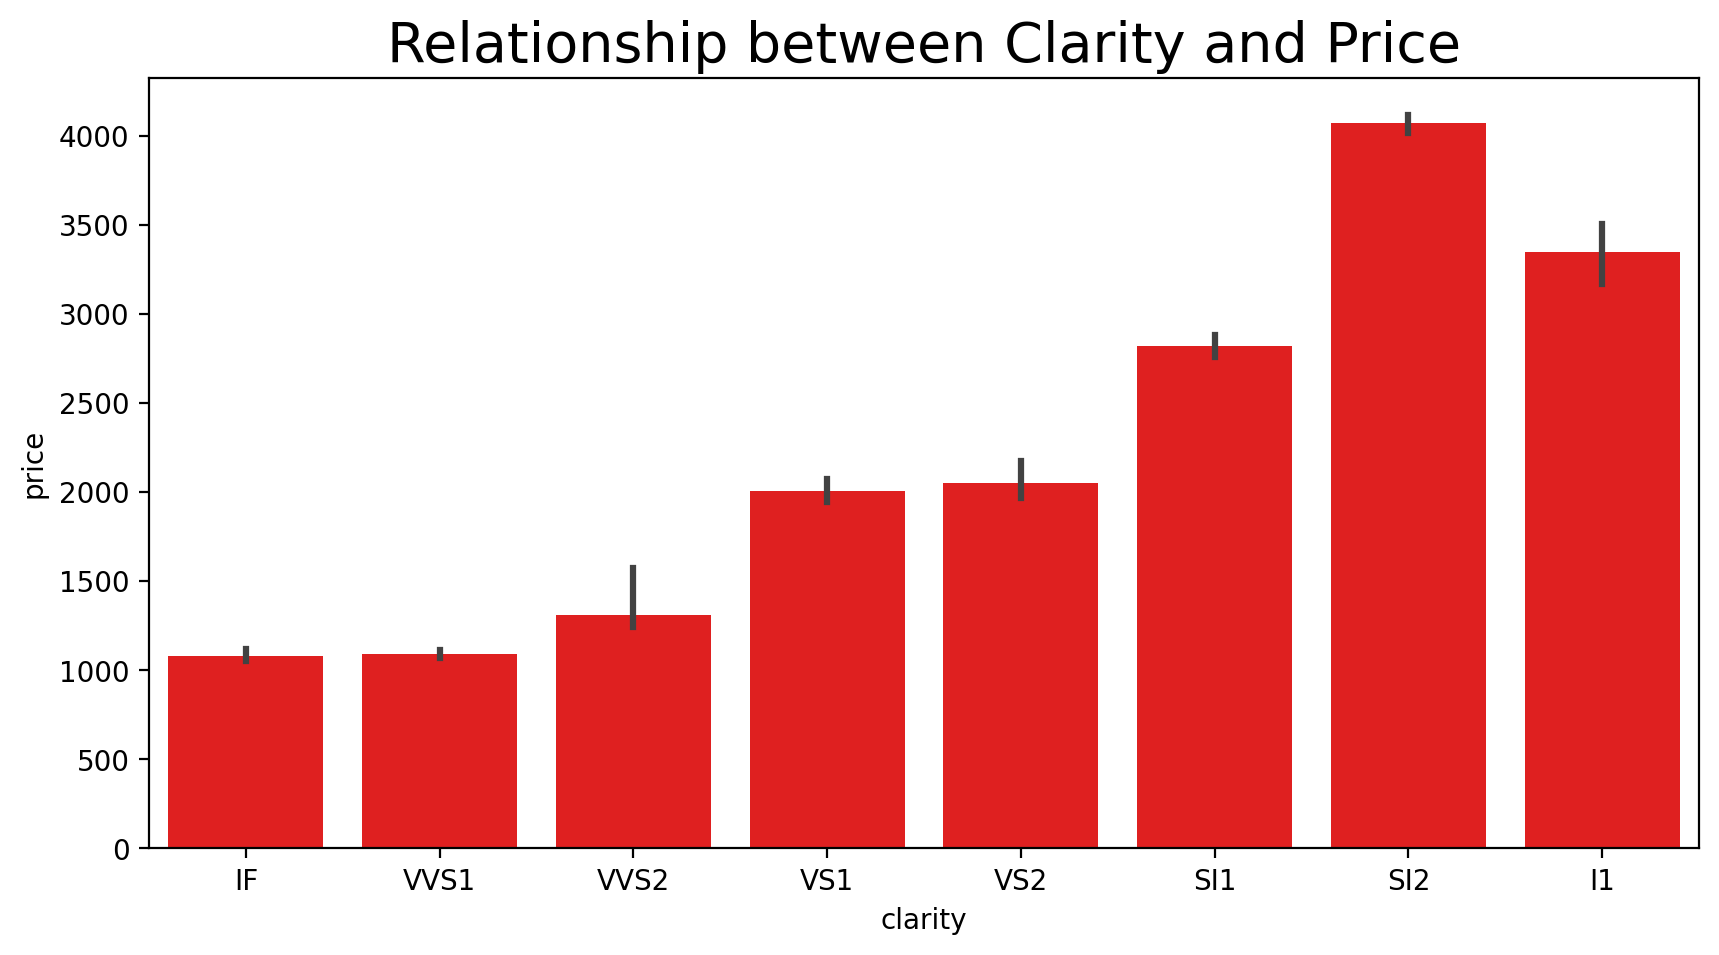

In [57]:
clarity_order = ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"]
plt.figure(figsize = (10,5) , dpi = 200)
sns.barplot(data = diamonds , x = "clarity" , y = "price" , color = "red", order = clarity_order , estimator = np.median)
plt.title("Relationship between Clarity and Price" , fontsize = 20)
plt.show()

Clarity measures the internal flaws (inclusions) or external blemishes of a diamond. Higher clarity grades (e.g., IF – Internally Flawless) are considered more desirable.

In the corrected barplot above, the x-axis now reflects the proper clarity grade order:
**IF > VVS1 > VVS2 > VS1 > VS2 > SI1 > SI2 > I1**

However, contrary to what we might expect, the median prices appear to increase **as clarity worsens**.
For example, diamonds with SI2 and I1 grades have much higher median prices than those with IF or VVS1.

This counterintuitive pattern suggests the presence of confounding variables — especially **carat weight**.
Lower-clarity diamonds may tend to be larger in size, which increases their value despite lower clarity.

This calls for a deeper investigation into the **interplay between carat and clarity** — which we can explore next.

In [59]:
diamonds.groupby("clarity")[["carat", "price"]].median()

,carat,price
clarity,,
I1,1.115,3346.0
IF,0.350,1080.0
SI1,0.760,2822.0
SI2,1.010,4072.0
VS1,0.570,2005.0
VS2,0.630,2052.0
VVS1,0.390,1092.5
VVS2,0.440,1311.0


Let's investigate deeper
Like the color grades, clarity grade is not a strong predictor of price.
The two worst clarity grades have the highest prices, while the best two have the lowest.

Let's look at the numbers

Do the worst clarity grades include more high-carat diamonds?
Similarly, do the best clarity grades tend to have lower-carat diamonds?


**Use the %75 quantile carat as a higher carat threshold.**

In [62]:
high_threshold = diamonds["carat"].quantile(0.75)
high_threshold


1.04

Our line is 1.04 we'll consider every diamond has a greater carat value than 1.04 as a high carat.

Let's look at the distribution of high-carat diamonds across the best and worst clarity grades.

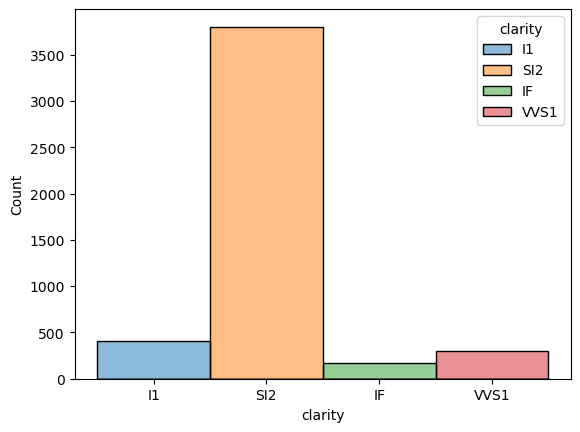

In [64]:
sns.histplot(data = diamonds[(diamonds["carat"] > high_threshold) &
                             (
                                     (diamonds["clarity"] == "SI2") |
                                     (diamonds["clarity"] == "IF") |
                                     (diamonds["clarity"] == "VVS1") |
                                     (diamonds["clarity"] == "I1")
                                )]   , x= "clarity" ,hue = "clarity" )
plt.show()

To better highlight how clarity interacts with diamond size, I filtered the dataset to include only diamonds in the top 25% by carat weight (greater than the 75th percentile).

This allows us to focus on larger diamonds and explore how often they appear in the highest and lowest clarity categories.

From the plot above, it's clear that diamonds with lower clarity grades such as **SI2** and **I1** are significantly more likely to have higher carat weights, whereas higher clarity grades like **IF** and **VVS1** are much less frequent in the high-carat group.

This pattern reinforces the earlier observation that **carat weight is a stronger driver of price** than clarity — many large diamonds fall into lower clarity categories, but still command higher prices due to their size.


### Deeper Insight: Clarity Grades Among High-Carat Diamonds

To further investigate the influence of **carat** on price across different **clarity grades**, I filtered the dataset to include only diamonds with **above-average carat weight** (greater than the 75th percentile).

#### Clarity Count Table (High-Carat Diamonds)

The table below shows the number of diamonds with high carat values in each clarity category:

| Clarity | Count |
|---------|-------|
| SI2     | 3801  |
| SI1     | 3380  |
| VS2     | 2830  |
| VS1     | 1759  |
| VVS2    | 713   |
| I1      | 409   |
| VVS1    | 303   |
| IF      | 170   |

This distribution shows that **lower-clarity grades** (e.g., *SI2*, *SI1*) are more common among large-carat diamonds, suggesting a potential trade-off between size and clarity.

#### Visual Representation

The histogram below reinforces this finding. It highlights that **diamonds with lower clarity** (such as *SI2* and *SI1*) dominate the high-carat group.

This suggests that **carat weight may have a stronger influence on price** than clarity, aligning with earlier observations from our color-based analysis.

In [67]:
diamonds[diamonds["carat"] > high_threshold]['clarity'].value_counts()

clarity
SI2     3801
SI1     3380
VS2     2830
VS1     1759
VVS2     713
I1       409
VVS1     303
IF       170
Name: count, dtype: int64

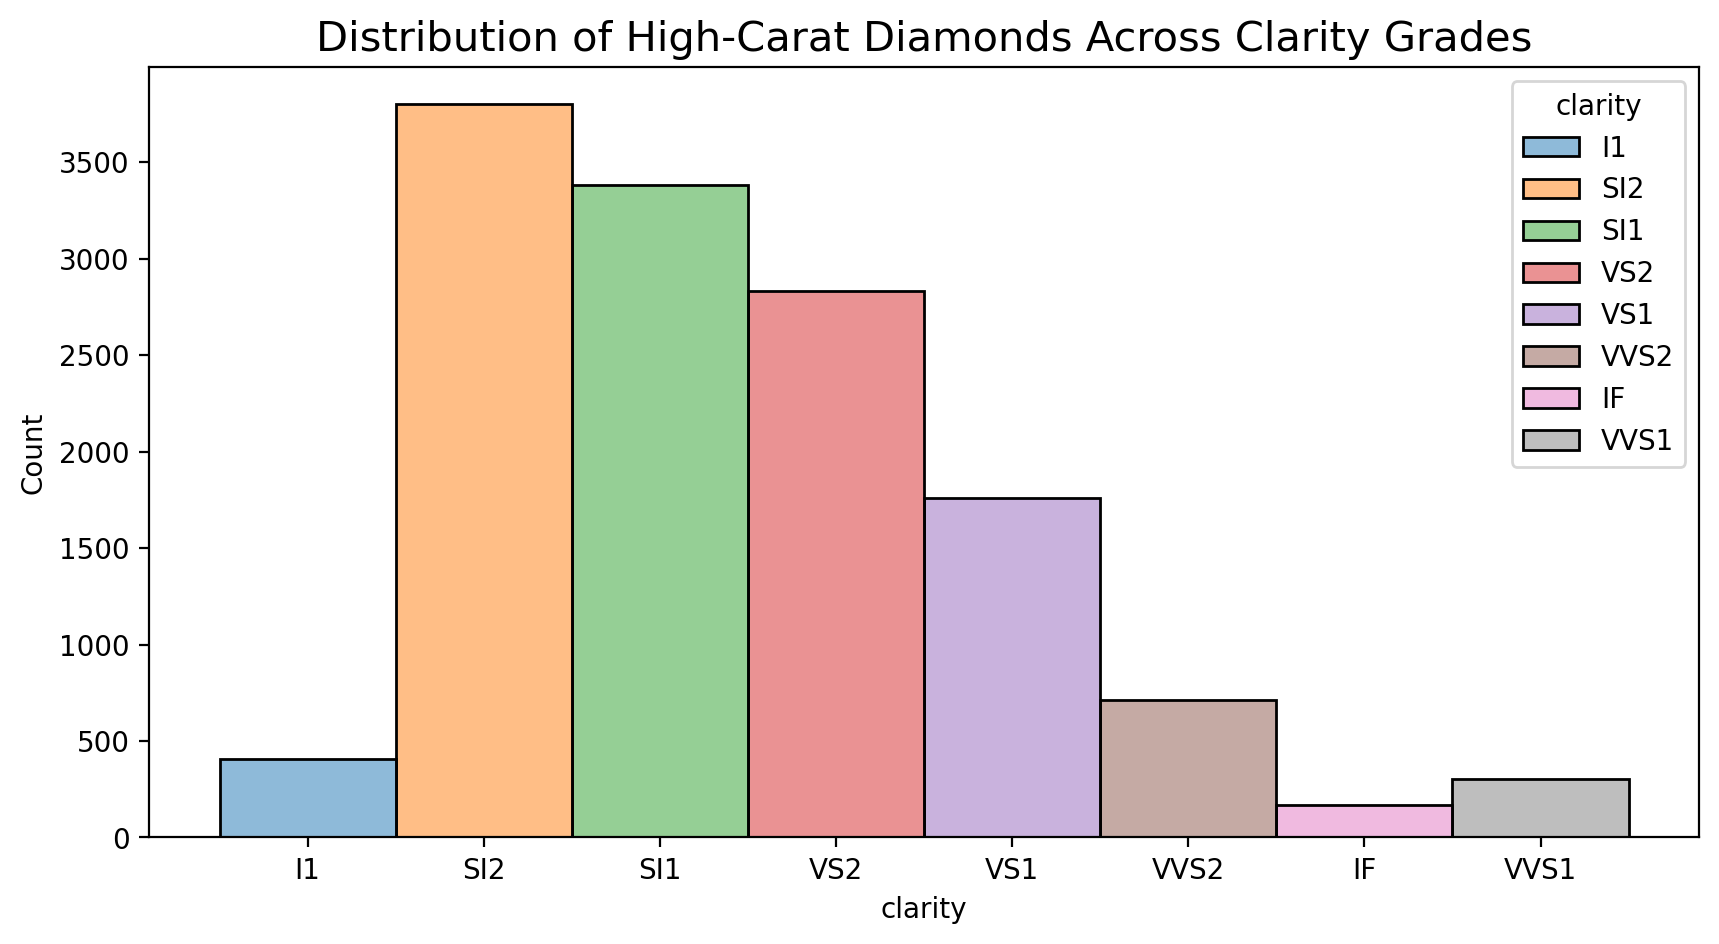

In [68]:
plt.figure(figsize = (10,5) , dpi = 200)
sns.histplot(data = diamonds[(diamonds["carat"] > high_threshold)] , x = "clarity" ,hue = "clarity")
plt.title("Distribution of High-Carat Diamonds Across Clarity Grades", fontsize = 15)
plt.show()

### 4.4 Correlation Between Numeric Features

To understand how numerical features relate to each other — and especially how they correlate with `price` — we compute the Pearson correlation matrix and visualize it using a heatmap.

This helps identify strong linear relationships and gives insight into which features may be useful for prediction or further exploration.


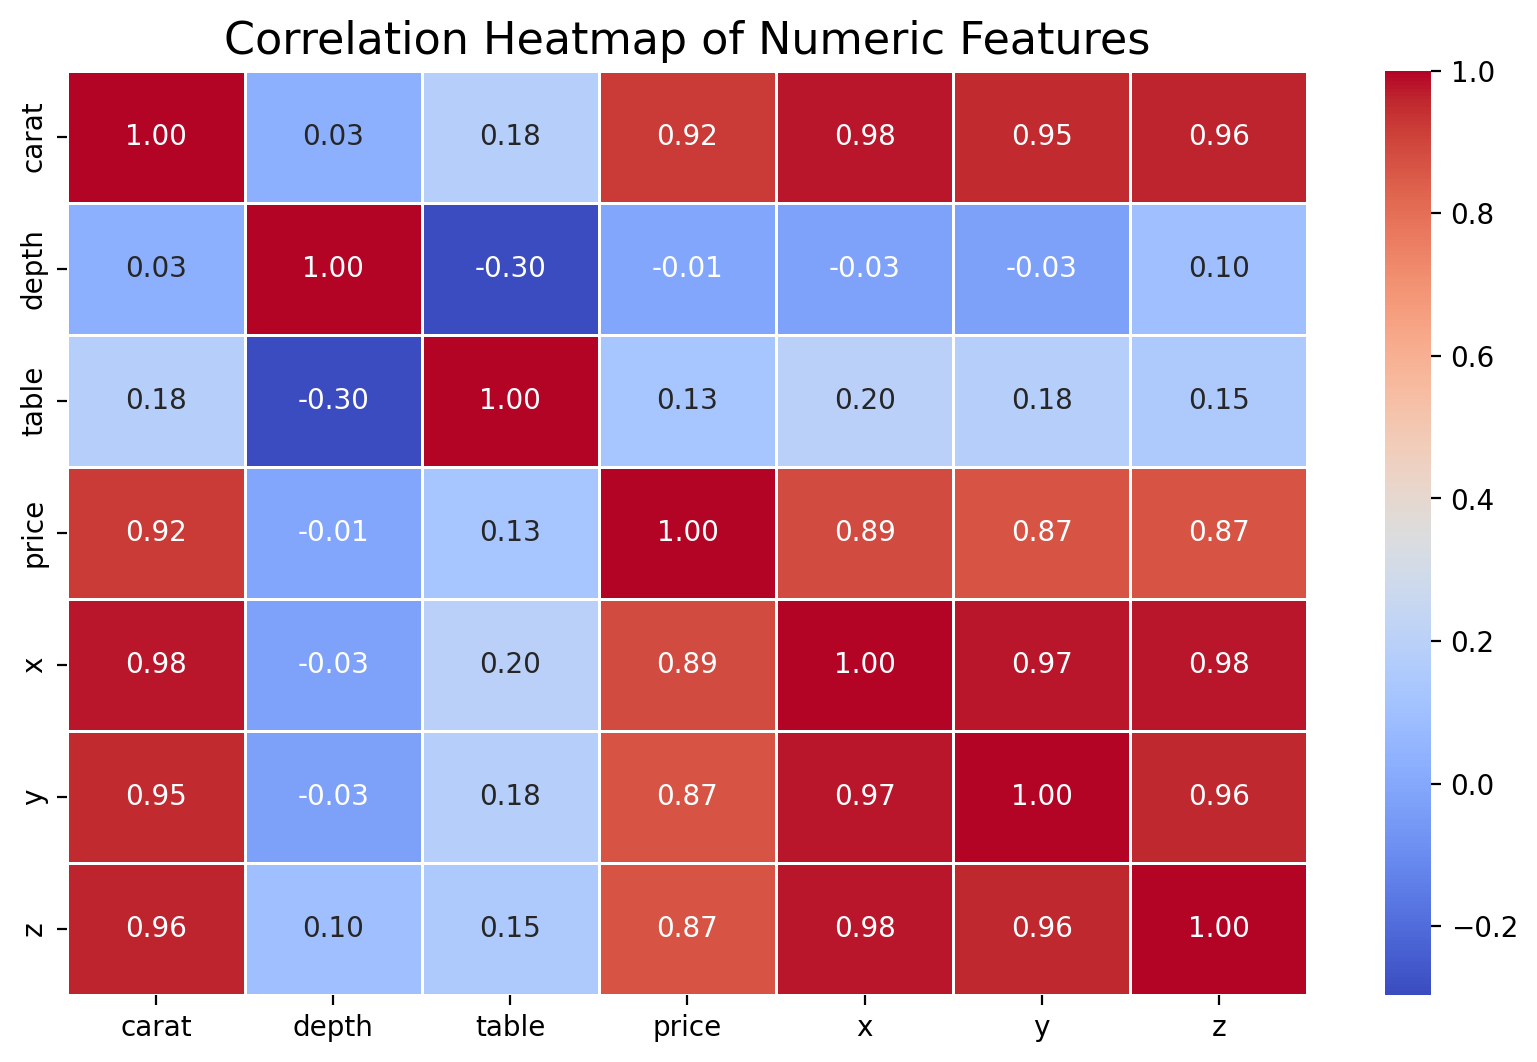

In [70]:
plt.figure(figsize=(10, 6), dpi=200)
sns.heatmap(diamonds.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features", fontsize=16)
plt.show()

### Observations from the Correlation Heatmap

- The feature most strongly correlated with `price` is **carat**, which makes sense as heavier diamonds generally cost more.
- Physical dimensions (`x`, `y`, `z`) also show moderate to strong correlation with `price`, though they may overlap in the information they provide.
- Features like `depth` and `table` show very low or almost no correlation with `price`, indicating they might have limited predictive power.
- Since some features are highly correlated with each other (e.g., `x`, `y`, and `z`), multicollinearity could be a concern in modeling scenarios.
- Overall, this analysis confirms that **size-related features drive the price more than the dimensional ratios or measurements like depth/table**.

These insights justify our next step: engineering a new feature like **volume** to summarize the spatial dimensions.

### 5. Feature Engineering.
In this section, we enhance our dataset by creationg new features that may help explain diamond pricing more effectively, Feature engineering can reveal hidden patterns, improve model performance, and deepen our understanding of the data.

### 5.1 Creating a Volume Feature

While `carat` measures the weight of a diamond, it does not directly reflect its physical size. To better capture a diamond's three-dimensional volume, we introduce a new feature:

volume = x * y * z

This new feature summarizes the physical space a diamond occupies and may serve as an additional explanatory variable for price.

In [74]:
diamonds["volume"] = diamonds["x"] * diamonds["y"] * diamonds["z"]

In [75]:
diamonds[["volume" , "x", "y", "z"]].head()

,volume,x,y,z
0,38.202030,3.95,3.98,2.43
1,34.505856,3.89,3.84,2.31
2,38.076885,4.05,4.07,2.31
3,46.724580,4.20,4.23,2.63
4,51.917250,4.34,4.35,2.75


We successfully created 'volume' feature. Let's explore this feature correlation between price

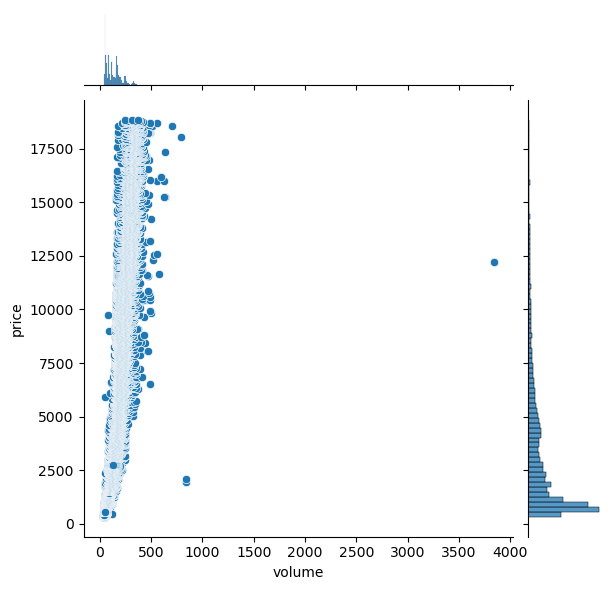

In [77]:
sns.jointplot(data= diamonds , y = "price" , x = "volume")
plt.show()


We're seeing visualizing the relationship between volume and price. However, the extreme right-side values( volume > 1000 or so) are stretching the scale and compressing the rest of data, making the pattern harder to interpret.

Let's fix.

Handle the outliers.

There are a few outliers. with very large volume values (possibly errors or extreme cases) that dominate the scale.
These can be clipped out for better visualization.

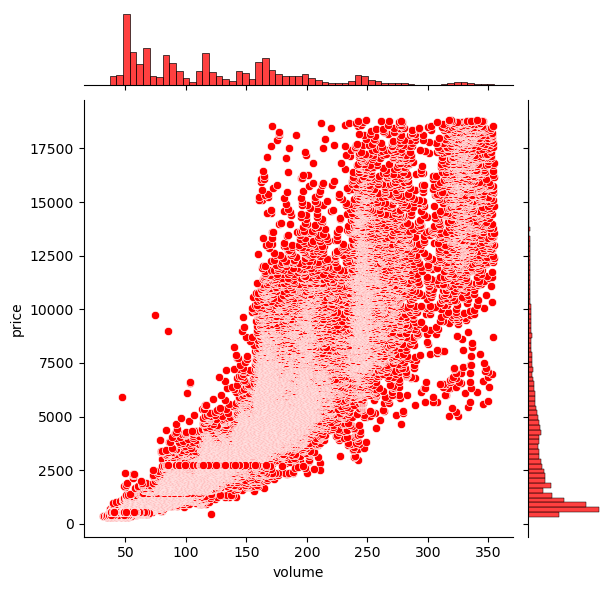

In [79]:
sns.jointplot(data = diamonds[diamonds["volume"] < diamonds["volume"].quantile(0.99)] , x = "volume" , y = "price" , color = "red")
plt.show()


### 5.2 Volume vs Price (After Outlier Removal)

In our initial volume vs price plot, the data was heavily skewed due to a few extreme outliers with abnormally large volume values. These values distorted the overall visualization, making it difficult to observe any meaningful trends.

To address this, we removed the top 1% of volume values using the 99th percentile threshold. This allowed us to focus on the vast majority of the data and uncover a more representative relationship between volume and price.

The filtered jointplot below shows that price tends to increase with volume, although the relationship is not perfectly linear. Larger diamonds generally cost more, but other factors (like cut, color, and clarity) also influence pricing significantly.

### 5.3 Correlation Heatmap

To gain a high-level overview of the relationships between numerical features in the dataset, I created a correlation heatmap. This visual representation helps identify how strongly each feature is linearly related to the others.

Some key observations from the heatmap:
- `carat` has the strongest positive correlation with `price`, which aligns with our earlier findings.
- `volume` (a feature we engineered) also shows a noticeable positive correlation with `price`, validating its relevance.
- Features like `x`, `y`, and `z` (dimensions of the diamond) are highly correlated with each other, and moderately correlated with `price`.
- Categorical features (like cut, color, and clarity) are not shown here since they are non-numeric, but we analyzed their impact in earlier sections.

This heatmap supports our hypothesis that physical features, especially weight and size, are the strongest indicators of diamond price.


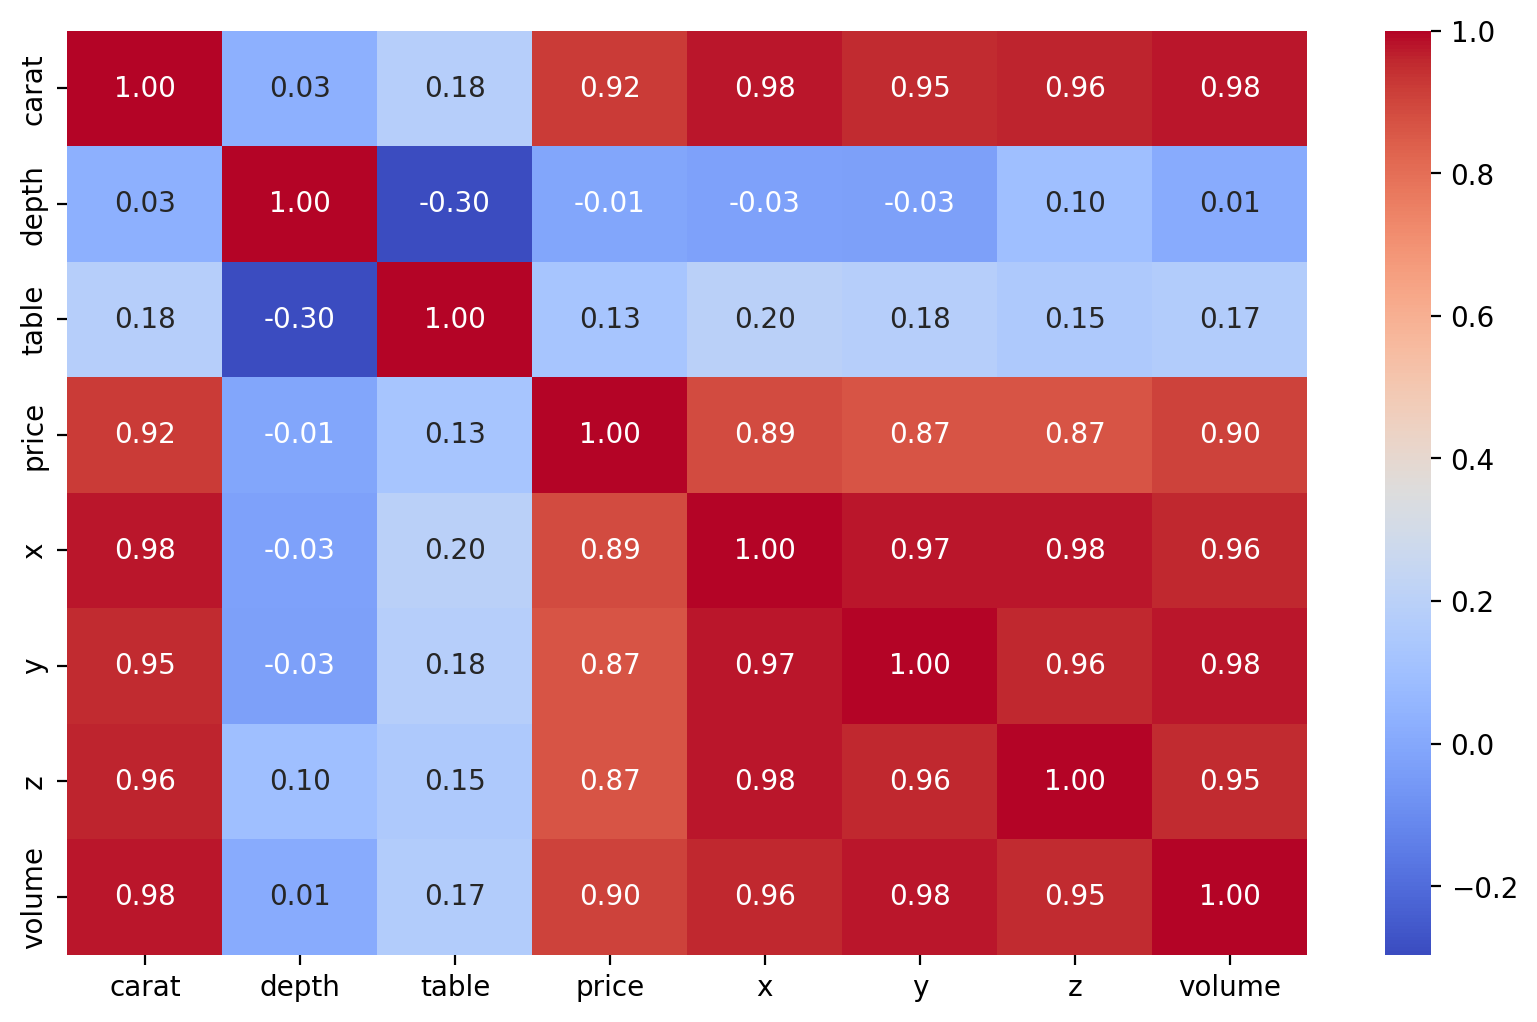

In [82]:
plt.figure(figsize = (10,6) , dpi = 200)
sns.heatmap(data = diamonds.corr(numeric_only = True),fmt=".2f" ,annot=True , cmap = "coolwarm")
plt.show()

## 6. Conclusion

In this exploratory data analysis of the Diamonds dataset, we aimed to uncover the key factors that influence diamond prices.

### Key Findings:

- **Carat** is the most dominant numerical feature correlated with price.
- Categorical features such as **cut**, **color**, and **clarity** also affect price, but their influence is more subtle and often interacts with carat.
- Newly engineered feature **volume** showed a positive correlation with price, though it introduced outliers that required filtering.
- Outliers and skewed distributions are common in pricing data, requiring proper cleaning and visualization strategies.

### Reflections:

- **Carat has the strongest impact on price**, regardless of other features. This was surprising because I initially expected that cut or color quality could outweigh carat in certain cases — but even diamonds with the best cut and color aren't necessarily expensive if the carat weight is low.

- **Larger diamonds tend to have lower cut and color quality.** This trade-off suggests that while size contributes heavily to price, higher-quality grades become harder to maintain as the diamond size increases — likely due to natural rarity or production limitations.

These findings helped me understand the complex balance between physical attributes and perceived value in diamond pricing.

### Limitations:
- The dataset does not contain customer preference or demand trends.
- All features are static; no time series or geographic data is present.

### Next Steps:
- Build a predictive model using features like carat, cut, and volume.
- Apply feature selection or dimensionality reduction (e.g., PCA).
- Perform price segmentation using clustering.